In [0]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 13s 218us/step - loss: 1.0818 - acc: 0.8985 - val_loss: 0.0969 - val_acc: 0.9675
Epoch 2/3
60000/60000 [==============================] - 12s 201us/step - loss: 0.0645 - acc: 0.9803 - val_loss: 0.0563 - val_acc: 0.9834
Epoch 3/3
60000/60000 [==============================] - 12s 207us/step - loss: 0.0510 - acc: 0.9843 - val_loss: 0.0513 - val_acc: 0.9848


[[2.6669578e-11 4.1471684e-09 1.0601574e-10 4.8711317e-12 9.9995458e-01
  6.7835025e-08 8.3424778e-09 3.1518760e-10 3.4021672e-05 1.1310891e-05]]


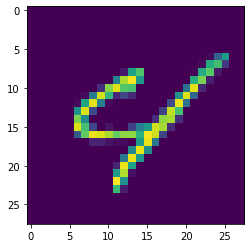

In [0]:
import matplotlib.pyplot as plt

img = X_test[420]
img2 = X_test[69]

plt.imshow(img.reshape(28, 28))
print(model.predict_proba(img.reshape(1, 28, 28, 1)))